Welcome to JupyROOT 6.28/02
707 707 707 2139 2139 2139


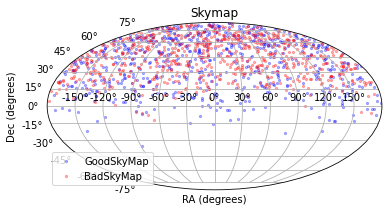

In [1]:
import ROOT
import os
import glob
import datetime
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import iy10_ultrashower_utilities as shower
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import matplotlib.ticker as mticker

def ProcessTimestamp( evtTimestamp ):
    evtNanosec = evtTimestamp & 0xFFFFFFFF
    evtTimestamp = (evtTimestamp >> 32) & 0xFFFFFFFF
    evtTime = datetime.datetime.fromtimestamp(evtTimestamp + evtNanosec*1e-9)
    return evtTime

#Initialization
GoodSkyMap = []
BadSkyMap = []
goodAlt, goodAz = np.loadtxt("/home/aklima/Muon_Shower_Data/Combined_histograms/GoodAltAz.txt", unpack=True)
badAlt, badAz = np.loadtxt("/home/aklima/Muon_Shower_Data/Combined_histograms/BadAltAz.txt", unpack=True)
goodTime = np.loadtxt("/home/aklima/Muon_Shower_Data/Combined_histograms/GoodTimestamp.txt", unpack=True)
badTime = np.loadtxt("/home/aklima/Muon_Shower_Data/Combined_histograms/BadTimestamp.txt", unpack=True)                  

print(len(goodAlt), len(goodAz), len(goodTime), len(badAlt), len(badAz), len(badTime))

for i in range(len(goodAlt)):
    SkyCoord = shower.MakeSkyCoord(goodAlt[i], goodAz[i], ProcessTimestamp(int(goodTime[i])))
    GoodRA, GoodDec = (SkyCoord.icrs.to_string('decimal')).split()
    GoodSkyMap.append((float(GoodRA), float(GoodDec)))

for i in range(len(goodAlt)):
    SkyCoord = shower.MakeSkyCoord(badAlt[i], badAz[i], ProcessTimestamp(int(badTime[i])))
    BadRA, BadDec = (SkyCoord.icrs.to_string('decimal')).split()
    BadSkyMap.append((float(BadRA), float(BadDec)))

GoodSkyMap = np.array(GoodSkyMap)
BadSkyMap = np.array(BadSkyMap)

np.savetxt("/home/aklima/Muon_Shower_Data/Combined_histograms/GoodSkymap.txt", GoodSkyMap, delimiter='\t', fmt="%0.3f")
np.savetxt("/home/aklima/Muon_Shower_Data/Combined_histograms/BadSkymap.txt", BadSkyMap, delimiter='\t',fmt="%0.3f")

fig, ax = plt.subplots(subplot_kw={'projection': 'mollweide'})

# Convert RA and Dec from degrees to radians
ra_rad_good = np.radians(GoodSkyMap[:, 0])
dec_rad_good = np.radians(GoodSkyMap[:, 1])
ra_rad_bad = np.radians(BadSkyMap[:, 0])
dec_rad_bad = np.radians(BadSkyMap[:, 1])

# Adjust the data from (0,2pi) to (-pi,pi)
ra_rad_good_wrapped = (ra_rad_good + np.pi) % (2 * np.pi) - np.pi 
ra_rad_bad_wrapped = (ra_rad_bad + np.pi) % (2 * np.pi) - np.pi

# Plot the data on the skymap
ax.scatter(ra_rad_good_wrapped, dec_rad_good, marker='o', color='b', label='GoodSkyMap', alpha=0.3, s=5)
ax.scatter(ra_rad_bad_wrapped, dec_rad_bad, marker='o', color='r', label='BadSkyMap', alpha=0.3, s=5)

# Customize the plot
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.set_title('Skymap')
ax.grid(True)

plt.savefig('/home/aklima/Muon_Shower_Data/Combined_histograms/Skymap.png', dpi=300)
plt.legend()
plt.show()